In [4]:
import sys, os
sys.path.append(os.path.abspath('../'))

import cleanlab
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.model_selection import StratifiedKFold

from cleanlab.pruning import get_noise_indices

from pathlib import Path

import numpy as np
import cv2
import os
from matplotlib import pyplot as plt


from pathlib import Path
from glob import glob

import numpy as np
from numpy import random
import tensorflow as tf
from sklearn.base import BaseEstimator

import cv2

from tqdm import tqdm
from tensorflow.python.keras.preprocessing import dataset_utils

import utils
from model import DataCentricClassifier

tf.random.set_seed(123)

In [5]:
experiment_dir = Path("../experiments/original/")
best_model_path = str(experiment_dir / "checkpoints" / "best_model")
dataset_dir = str(experiment_dir / "data" / "train")
image_paths, image_labels, class_names = utils.get_image_paths_and_labels(dataset_dir, shuffle=False, random_seed=None)

Found 2067 files belonging to 10 classes.


In [6]:
classifier = DataCentricClassifier(
    model_path=None,
    image_paths=image_paths,
    image_labels=image_labels,
    class_names=class_names,
    batch_size=8,
    random_seed=123,
    epoch=10
)

Creating ResNet50 model...


In [7]:
train_size = len(image_paths)

In [8]:
X_train = np.arange(train_size)
y_train = image_labels

In [9]:
def estimate_confident_joint_and_cv_pred_proba(
        X,
        s,
        clf,
        cv_n_folds=5,
        thresholds=None,
        seed=None,
        calibrate=True,
):
    cleanlab.latent_estimation.assert_inputs_are_valid(X, s)
    # Number of classes
    K = len(np.unique(s))

    # Ensure labels are of type np.array()
    s = np.asarray(s)

    # Create cross-validation object for out-of-sample predicted probabilities.
    # CV folds preserve the fraction of noisy positive and
    # noisy negative examples in each class.
    kf = StratifiedKFold(n_splits=cv_n_folds, shuffle=True, random_state=seed)

    # Intialize psx array
    psx = np.zeros((len(s), K))

    # Split X and s into "cv_n_folds" stratified folds.
    for k, (cv_train_idx, cv_holdout_idx) in enumerate(kf.split(X, s)):
        clf.reset_weights()

        # Select the training and holdout cross-validated sets.
        X_train_cv, X_holdout_cv = X[cv_train_idx], X[cv_holdout_idx]
        s_train_cv, s_holdout_cv = s[cv_train_idx], s[cv_holdout_idx]

        # Fit the clf classifier to the training set and
        # predict on the holdout set and update psx.
        clf.fit(X_train_cv, s_train_cv)
        psx_cv = clf.predict_proba(X_holdout_cv)  # P(s = k|x) # [:,1]
        psx[cv_holdout_idx] = psx_cv

    # Compute the confident counts, a K x K matrix for all pairs of labels.
    confident_joint = cleanlab.latent_estimation.compute_confident_joint(
        s=s,
        psx=psx,  # P(s = k|x)
        thresholds=thresholds,
        calibrate=calibrate,
    )

    return confident_joint, psx

In [10]:
cj, psx = estimate_confident_joint_and_cv_pred_proba(X_train, y_train, clf=classifier)

Recreating model...
Creating ResNet50 model...
Filtered dataset size: 1653
Epoch 1/10
207/207 [==============================] - 8s 31ms/step - loss: 2.0617 - accuracy: 0.2819
Epoch 2/10
207/207 [==============================] - 6s 30ms/step - loss: 1.5602 - accuracy: 0.4828
Epoch 3/10
207/207 [==============================] - 7s 33ms/step - loss: 1.2766 - accuracy: 0.5814
Epoch 4/10
207/207 [==============================] - 6s 31ms/step - loss: 1.1035 - accuracy: 0.6497
Epoch 5/10
207/207 [==============================] - 6s 29ms/step - loss: 0.9364 - accuracy: 0.6969
Epoch 6/10
207/207 [==============================] - 6s 29ms/step - loss: 0.8121 - accuracy: 0.7556
Epoch 7/10
207/207 [==============================] - 6s 30ms/step - loss: 0.7065 - accuracy: 0.7889
Epoch 8/10
207/207 [==============================] - 6s 29ms/step - loss: 0.6343 - accuracy: 0.8094
Epoch 9/10
207/207 [==============================] - 6s 29ms/step - loss: 0.5489 - accuracy: 0.8524
Epoch 10/10
207/

100%|██████████| 414/414 [00:18<00:00, 22.87it/s]


Recreating model...
Creating ResNet50 model...
Filtered dataset size: 1653
Epoch 1/10
207/207 [==============================] - 8s 31ms/step - loss: 2.1876 - accuracy: 0.2426
Epoch 2/10
207/207 [==============================] - 7s 33ms/step - loss: 1.5914 - accuracy: 0.4767
Epoch 3/10
207/207 [==============================] - 6s 29ms/step - loss: 1.3255 - accuracy: 0.5850
Epoch 4/10
207/207 [==============================] - 7s 35ms/step - loss: 1.1588 - accuracy: 0.6364
Epoch 5/10
207/207 [==============================] - 8s 40ms/step - loss: 0.9570 - accuracy: 0.7145
Epoch 6/10
207/207 [==============================] - 7s 35ms/step - loss: 0.8276 - accuracy: 0.7562
Epoch 7/10
207/207 [==============================] - 7s 35ms/step - loss: 0.7471 - accuracy: 0.7804
Epoch 8/10
207/207 [==============================] - 7s 33ms/step - loss: 0.6455 - accuracy: 0.8197
Epoch 9/10
207/207 [==============================] - 6s 29ms/step - loss: 0.5542 - accuracy: 0.8469
Epoch 10/10
207/

100%|██████████| 414/414 [00:16<00:00, 25.24it/s]


Recreating model...
Creating ResNet50 model...
Filtered dataset size: 1654
Epoch 1/10
207/207 [==============================] - 8s 31ms/step - loss: 2.1597 - accuracy: 0.2660
Epoch 2/10
207/207 [==============================] - 6s 29ms/step - loss: 1.6190 - accuracy: 0.4607
Epoch 3/10
207/207 [==============================] - 6s 30ms/step - loss: 1.3273 - accuracy: 0.5774
Epoch 4/10
207/207 [==============================] - 6s 30ms/step - loss: 1.1357 - accuracy: 0.6487
Epoch 5/10
207/207 [==============================] - 7s 31ms/step - loss: 0.9800 - accuracy: 0.7007
Epoch 6/10
207/207 [==============================] - 6s 29ms/step - loss: 0.8314 - accuracy: 0.7491
Epoch 7/10
207/207 [==============================] - 6s 29ms/step - loss: 0.7362 - accuracy: 0.7799
Epoch 8/10
207/207 [==============================] - 6s 31ms/step - loss: 0.6353 - accuracy: 0.8168
Epoch 9/10
207/207 [==============================] - 6s 30ms/step - loss: 0.5488 - accuracy: 0.8452
Epoch 10/10
207/

100%|██████████| 413/413 [00:20<00:00, 19.97it/s]


Recreating model...
Creating ResNet50 model...
Filtered dataset size: 1654
Epoch 1/10
207/207 [==============================] - 8s 31ms/step - loss: 2.1559 - accuracy: 0.2545
Epoch 2/10
207/207 [==============================] - 7s 32ms/step - loss: 1.6232 - accuracy: 0.4692
Epoch 3/10
207/207 [==============================] - 6s 30ms/step - loss: 1.3490 - accuracy: 0.5810
Epoch 4/10
207/207 [==============================] - 6s 29ms/step - loss: 1.1406 - accuracy: 0.6360
Epoch 5/10
207/207 [==============================] - 6s 30ms/step - loss: 0.9971 - accuracy: 0.6935
Epoch 6/10
207/207 [==============================] - 6s 31ms/step - loss: 0.8497 - accuracy: 0.7539
Epoch 7/10
207/207 [==============================] - 6s 29ms/step - loss: 0.7474 - accuracy: 0.7884
Epoch 8/10
207/207 [==============================] - 6s 31ms/step - loss: 0.6060 - accuracy: 0.8307
Epoch 9/10
207/207 [==============================] - 9s 45ms/step - loss: 0.5214 - accuracy: 0.8615
Epoch 10/10
207/

100%|██████████| 413/413 [00:48<00:00,  8.55it/s]


Recreating model...
Creating ResNet50 model...
Filtered dataset size: 1654
Epoch 1/10
207/207 [==============================] - 8s 32ms/step - loss: 2.2567 - accuracy: 0.2461
Epoch 2/10
207/207 [==============================] - 6s 29ms/step - loss: 1.6232 - accuracy: 0.4510
Epoch 3/10
207/207 [==============================] - 6s 30ms/step - loss: 1.3524 - accuracy: 0.5719
Epoch 4/10
207/207 [==============================] - 7s 32ms/step - loss: 1.1691 - accuracy: 0.6185
Epoch 5/10
207/207 [==============================] - 6s 31ms/step - loss: 1.0092 - accuracy: 0.6947
Epoch 6/10
207/207 [==============================] - 7s 32ms/step - loss: 0.8906 - accuracy: 0.7352
Epoch 7/10
207/207 [==============================] - 6s 30ms/step - loss: 0.7561 - accuracy: 0.7733
Epoch 8/10
207/207 [==============================] - 7s 34ms/step - loss: 0.6514 - accuracy: 0.8222
Epoch 9/10
207/207 [==============================] - 6s 30ms/step - loss: 0.5550 - accuracy: 0.8513
Epoch 10/10
207/

100%|██████████| 413/413 [00:16<00:00, 24.36it/s]


In [11]:
cj, psx

(array([[232,   8,  10,   4,   0,   0,   0,   0,   0,   7],
        [ 15, 101,  21,   6,   1,   5,   1,   0,   2,   5],
        [  6,  20, 123,  12,   1,   9,   4,   4,   1,   6],
        [  0,   6,  17, 207,  10,   3,   3,   1,  27,   7],
        [  1,   3,   1,  10, 158,   3,   0,   0,   1,  19],
        [  0,   1,   2,   3,  13, 136,   5,   2,   5,  14],
        [  0,   3,  15,   8,   1,  28, 107,  27,   3,   1],
        [  0,   0,  16,  12,   0,   5,  46, 114,   5,   1],
        [  0,   0,   7,  31,   4,   3,   0,   8, 168,  13],
        [  1,   1,   1,   4,  12,   4,   0,   2,   8, 146]]),
 array([[9.52641606e-01, 1.65833477e-02, 7.32017215e-03, ...,
         3.69532703e-04, 1.09141390e-03, 6.46388670e-03],
        [9.94819224e-01, 3.30255949e-03, 3.68923123e-04, ...,
         3.86979536e-06, 7.29918756e-05, 8.91678559e-04],
        [9.63203847e-01, 1.60478316e-02, 6.95731631e-03, ...,
         4.81367852e-06, 9.66494263e-04, 1.20804394e-02],
        ...,
        [2.62518675e-04, 

In [12]:
psx.shape

(2067, 10)

In [13]:
est_py, est_nm, est_inv = cleanlab.latent_estimation.estimate_latent(cj, y_train)

In [14]:
max_images = 32

noise_idx = cleanlab.pruning.get_noise_indices(y_train, psx, est_inv, prune_method='prune_by_class', confident_joint=cj)
print('Number of estimated errors in the dataset:', sum(noise_idx))

pred = np.argmax(psx, axis=1)
ordered_noise_idx = np.argsort(np.asarray([psx[i][j] for i,j in enumerate(y_train)])[noise_idx])[::-1]

# if sum(noise_idx) >= max_images:
prob_given = np.asarray([psx[i][j] for i,j in enumerate(y_train)])[noise_idx][ordered_noise_idx][:max_images]
prob_pred = np.asarray([psx[i][j] for i,j in enumerate(pred)])[noise_idx][ordered_noise_idx][:max_images]
img_idx = np.arange(len(noise_idx))[noise_idx][ordered_noise_idx][:max_images]
label4viz = y_train[noise_idx][ordered_noise_idx][:max_images]
pred4viz = pred[noise_idx][ordered_noise_idx][:max_images]

img_labels = ["given: "+str( class_names[label4viz[w]])+" | conf: "+str(np.round(prob_given[w],3)) for w in range(len(label4viz))]
img_preds = ["pred: "+str( class_names[pred4viz[w]])+" | conf: "+str(np.round(prob_pred[w],3)) for w in range(len(pred4viz))]


Number of estimated errors in the dataset: 574


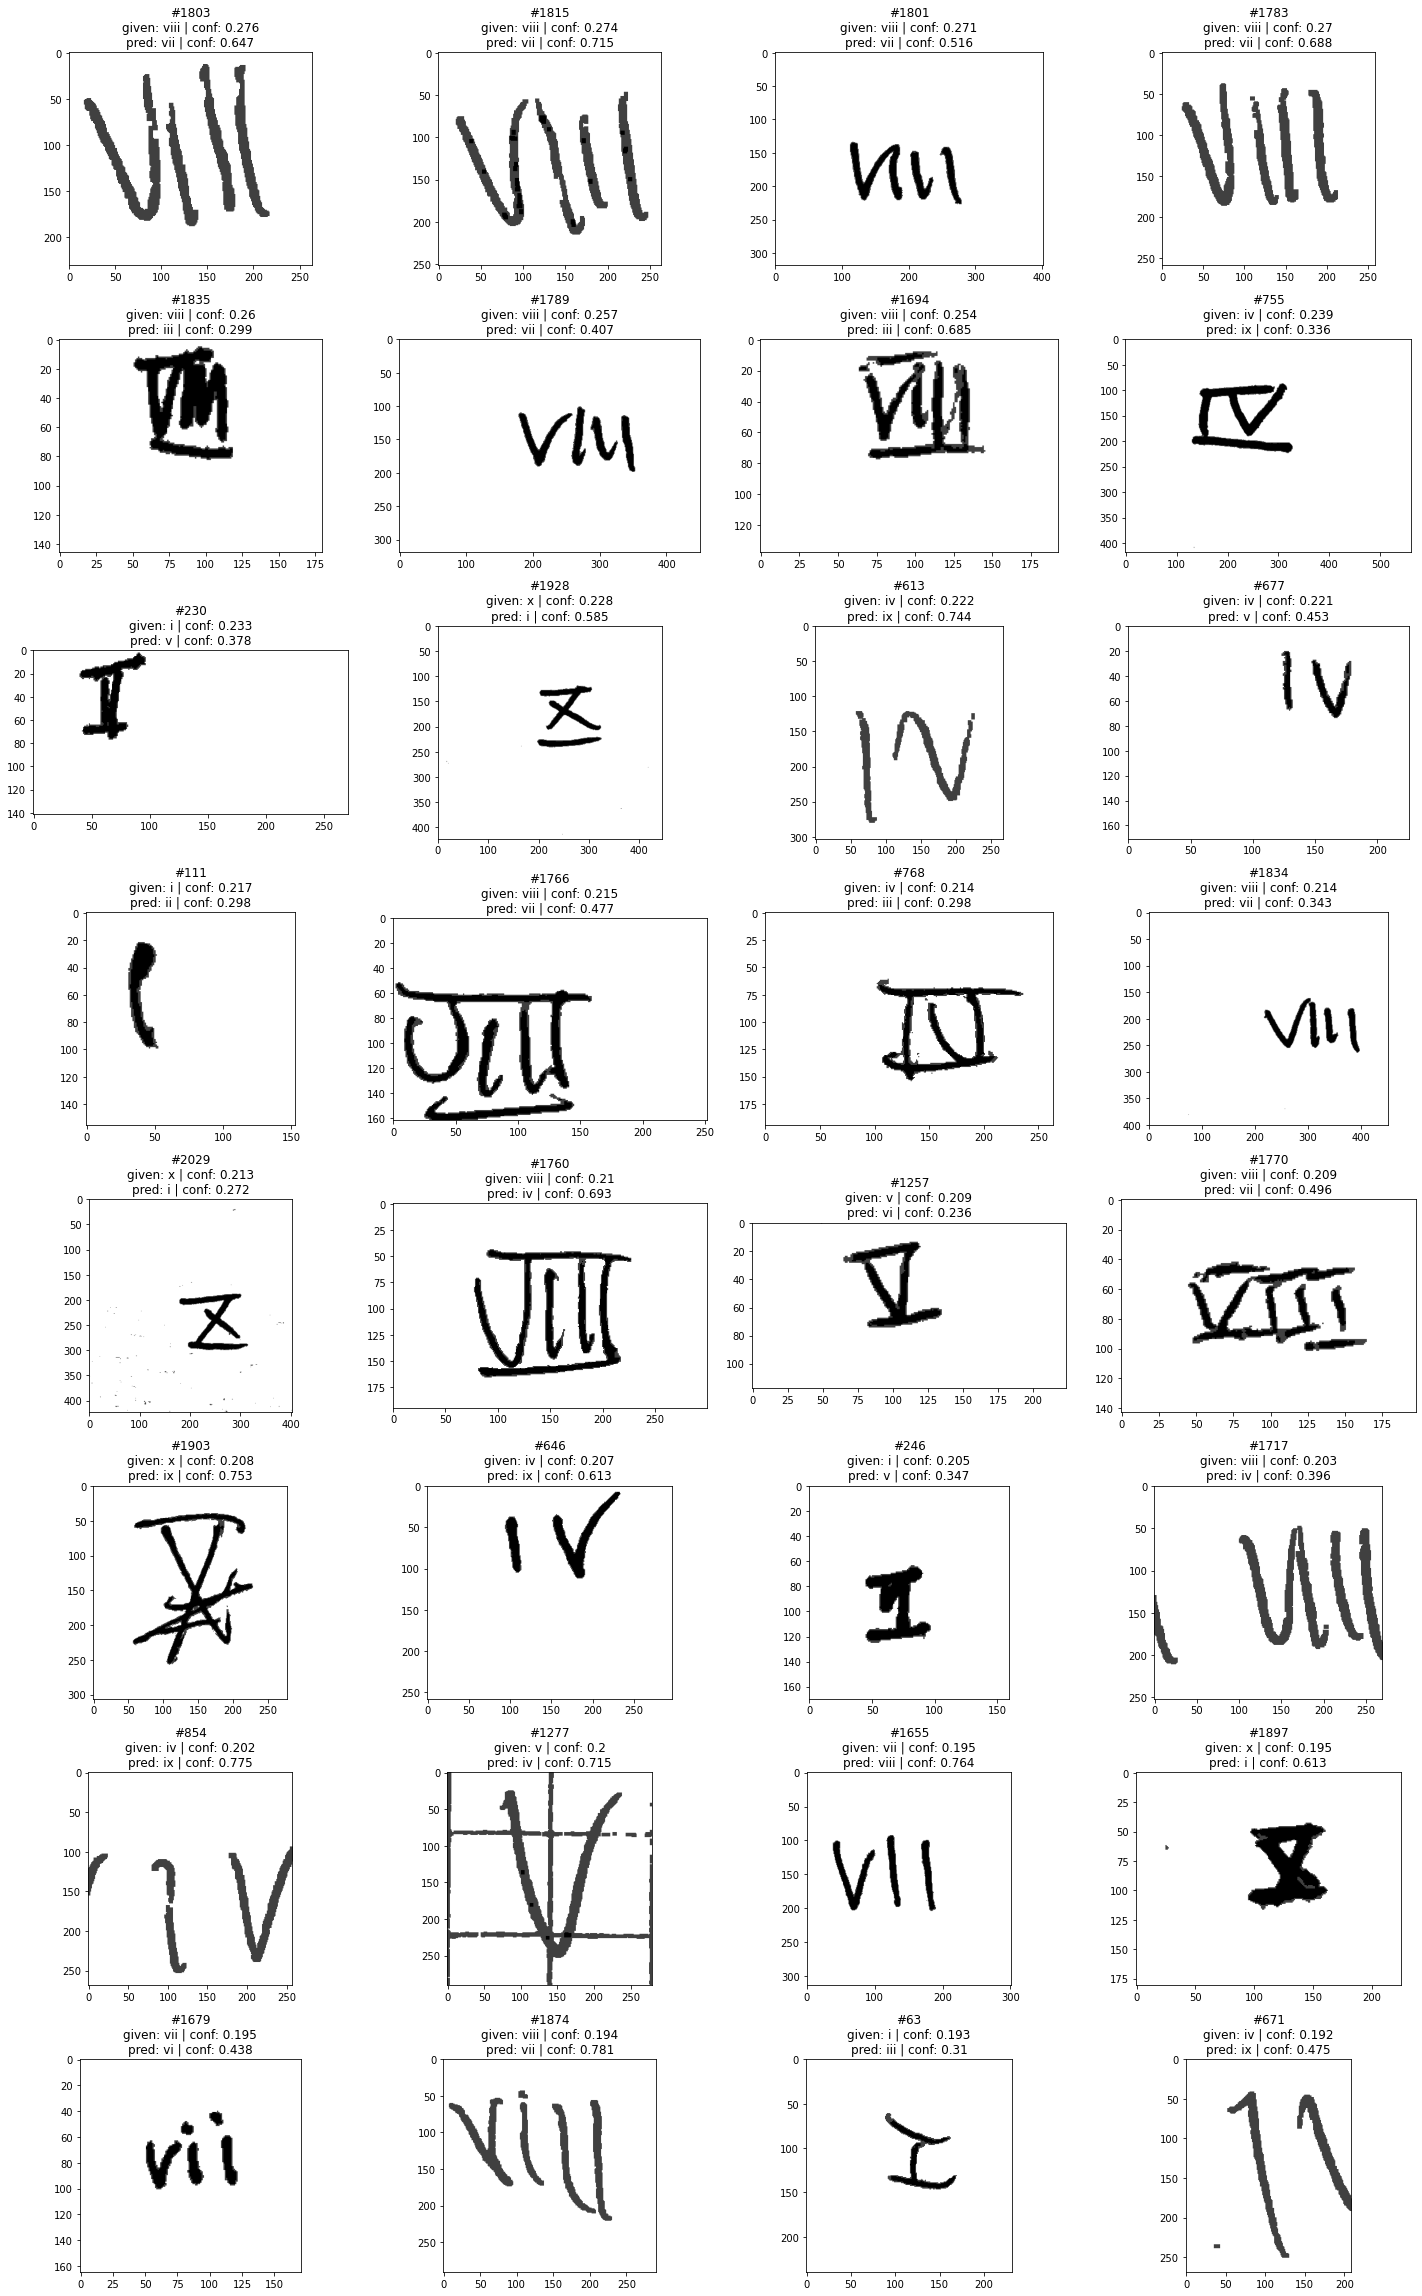

In [15]:
ncols = 4
nrows = int(np.ceil(len(img_labels) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))
for ax, image_index, image_label, image_pred in zip(axes.ravel(), img_idx, img_labels, img_preds):
    image_path = image_paths[image_index]
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    ax.set_title(f"#{image_index}\n{image_label}\n{image_pred}")
    ax.imshow(img, cmap = "gray", vmin=0, vmax=255)
    #ax.axis('off')
fig.tight_layout()